In [94]:
import numpy as np
import numpy as np
import f21_predict_base as base
import F21DataLoader as dl
import F21Stats as f21stats
import matplotlib.pyplot as plt
import importlib


importlib.reload(base)
importlib.reload(dl)
importlib.reload(f21stats)




<module 'F21Stats' from '/Users/meghapatil/Documents/Sameer/Physics/girish-kulkarni/Code/21cm-forest/code/F21Stats.py'>

In [85]:
def load_dataset(datafiles, psbatchsize=10, ps_bins=None, limitsamplesize=None, min_los=False, perc_bins=100):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=ps_bins, limitsamplesize=limitsamplesize, scale_ps=True, use_bispectrum=True, perc_bins_to_use=perc_bins)#, limitsamplesize=4,)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']
    all_params = results['params']
    all_bispec = results['bispectrum']
    all_k_bispec = results['k_bispec']
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    print(f"sample bispectrum:{all_bispec[0]}")
    print(f"sample k_bispec:{all_k_bispec[0]}")
    print(f"\nCombined data shape: {all_los.shape}")
    print(f"Combined parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks, all_bispec, all_k_bispec)

def plot(ps_set, ks, psn=None, ksn=None, title=None, labels=None, xscale='log', yscale='log'):
    #print(f"shapes: {ps_set.shape},{ks.shape}")

    base.initplt()
    plt.title(f'{title}')
    print(type(ps_set[0]))
    if isinstance(ps_set[0], np.ndarray):
        for i, ps in enumerate(ps_set):
            if labels is not None: label = labels[i]
            row_ks = None
            if ks is not None:
                if isinstance(ks[0], np.ndarray): row_ks = ks[i]
                else: row_ks = ks
            print(f"Plotting: {row_ks}, {ps}")
            plt.plot(row_ks, ps, label=label, marker='o', alpha=0.2)
    else:
        plt.plot(ks*1e6, ps, label=labels, marker='o')
        #plt.scatter(ks[1:]*1e6, ps[1:], label=label)
    if psn is not None: plt.plot(ksn[0], psn[0], "r--", label='Noise', alpha=0.2)
         
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(r'k1 (Hz$^{-1}$)')
    plt.ylabel(r'$B_{21}$')
    plt.legend()
    plt.show()

In [33]:
(paramsn, freqn, losn, psn, ksn, bispecn, kbispecn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=1000)
(paramssn25_1, freqsn25_1, lossn25_1, pssn25_1, kssn25_1, bispecsn25_1, kbispec25_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)
(paramssn52_2, freqsn52_2, lossn52_2, pssn52_2, kssn52_2, bispecsn52_2, kbispec52_2) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)
(paramssn94_4, freqsn94_4, lossn94_4, pssn94_4, kssn94_4, bispecsn94_4, kbispec94_4) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)
(paramssomax, freqsomax, lossomax, pssomax, kssomax, bispecsomax, kbispecsomax) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_8kHz.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)
(paramssn80_1, freqsn80_1, lossn80_1, pssn80_1, kssn80_1, bispecsn80_1, kbispec80_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)
(paramssn52_1, freqsn52_1, lossn52_1, pssn52_1, kssn52_1, bispecsn52_1, kbispec52_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10)


sample bispectrum:[0.00427481 0.00424555 0.00483347 0.00446001 0.00437987 0.00484359
 0.00459061 0.00411906 0.00429735 0.00436155 0.00306441 0.0035239
 0.00337462 0.00293609 0.00360966 0.00374943 0.00302004 0.00324089
 0.00355465 0.00343913]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (100, 2762)
Combined parameters shape: (100, 2)
sample bispectrum:[0.00452378 0.00405055 0.00436848 0.00459551 0.00444816 0.00435782
 0.00475028 0.00426984 0.00477022 0.0042684  0.00369687 0.00337304
 0.00345423 0.00352528 0.00366127 0.00328047 0.00362935 0.0035481
 0.00339267 0.00378119]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466

(1, 1382) (1, 1382)
(1, 20) (1, 20)
[[9.82043526e-06 2.94613058e-05 4.91021763e-05 6.87430468e-05
  8.83839174e-05 1.08024788e-04 1.27665658e-04 1.47306529e-04
  1.66947399e-04 1.86588270e-04 2.06229141e-04 2.25870011e-04
  2.45510882e-04 2.65151752e-04 2.84792623e-04 3.04433493e-04
  3.24074364e-04 3.43715234e-04 3.63356105e-04 3.82996975e-04]]


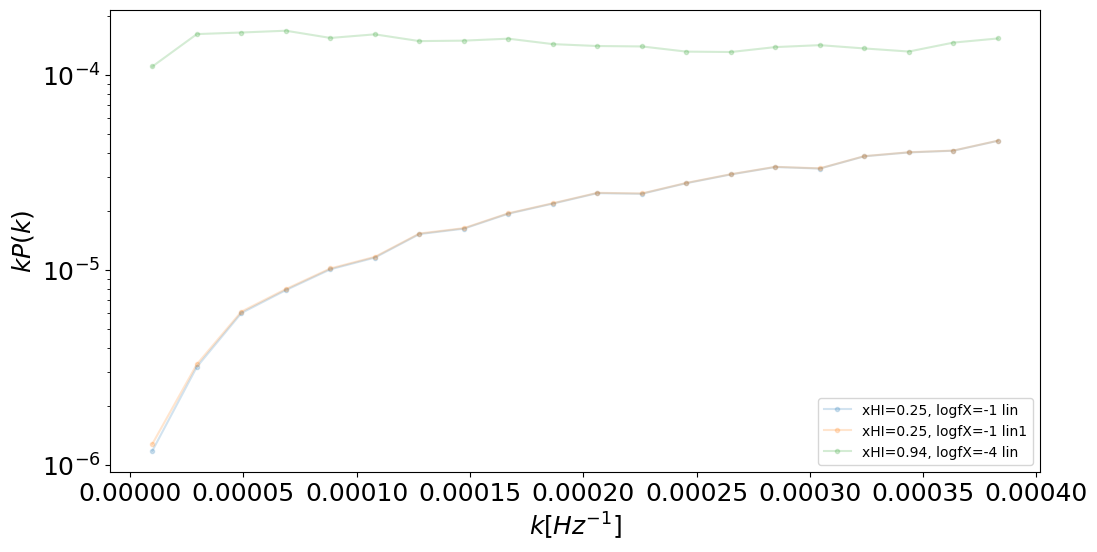

In [34]:
print(f"{kssn25_1.shape} {pssn25_1.shape}")

kssn25_1_bin, pssn25_1_bin = f21stats.linbin_ps(kssn25_1, pssn25_1, 20, 100)
kssn94_4_bin, pssn94_4_bin = f21stats.linbin_ps(kssn94_4, pssn94_4, 20, 100)
#kssn25_1_logbin, pssn25_1_logbin = f21stats.logbin_power_spectrum_by_k(kssn25_1, pssn25_1, silent=False)
#kssn94_4_logbin, pssn94_4_logbin = f21stats.logbin_power_spectrum_by_k(kssn94_4, pssn94_4, silent=False)
pssn25_1_bin1 = f21stats.bin_ps_data(pssn25_1, 20, 100)

print(f"{kssn25_1_bin.shape} {pssn25_1_bin.shape}")
print(f"{kssn25_1_bin}")
base.initplt()
plt.plot(kssn25_1_bin[0], pssn25_1_bin[0], marker='.', alpha=0.2, label='xHI=0.25, logfX=-1 lin')
plt.plot(kssn25_1_bin[0], pssn25_1_bin1[0]+1e-7, marker='.', alpha=0.2, label='xHI=0.25, logfX=-1 lin1')
#plt.plot(kssn25_1_logbin[0], pssn25_1_logbin[0], marker='.', alpha=0.2, label='xHI=0.25, logfX=-1 logbin')
plt.plot(kssn94_4_bin[0], pssn94_4_bin[0], marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 lin')
#plt.plot(kssn94_4_bin[0], pssn94_4_bin[0], marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 logbin')

plt.yscale('log')
plt.ylabel(r'$k P(k)$')
plt.xlabel(r'$k [Hz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()

(1, 20)
(1, 20)


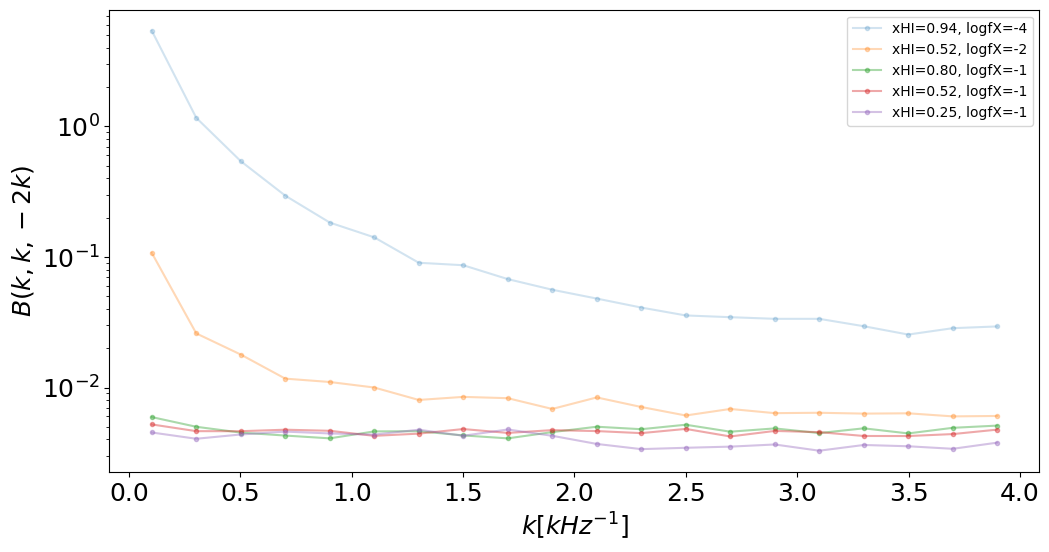

In [35]:
print(kbispec94_4.shape)
print(bispecsn94_4.shape)
base.initplt()
plt.plot(kbispec94_4[0]*8, bispecsn94_4[0], marker='.', alpha=0.2, label='xHI=0.94, logfX=-4')
plt.plot(kbispec52_2[0]*8, bispecsn52_2[0], marker='.', alpha=0.3, label='xHI=0.52, logfX=-2')
plt.plot(kbispec80_1[0]*8, bispecsn80_1[0], marker='.', alpha=0.4, label='xHI=0.80, logfX=-1')
plt.plot(kbispec52_1[0]*8, bispecsn52_1[0], marker='.', alpha=0.4, label='xHI=0.52, logfX=-1')
plt.plot(kbispec25_1[0]*8, bispecsn25_1[0], marker='.', alpha=0.4, label='xHI=0.25, logfX=-1')

plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()

sample bispectrum:[0.00427481 0.00424555 0.00483347 0.00446001 0.00437987 0.00484359
 0.00459061 0.00411906 0.00429735 0.00436155 0.00306441 0.0035239
 0.00337462 0.00293609 0.00360966 0.00374943 0.00302004 0.00324089
 0.00355465 0.00343913]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (100, 2762)
Combined parameters shape: (100, 2)
sample bispectrum:[0.00452378 0.00405055 0.00436848 0.00459551 0.00444816 0.00435782
 0.00475028 0.00426984 0.00477022 0.0042684  0.00369687 0.00337304
 0.00345423 0.00352528 0.00366127 0.00328047 0.00362935 0.0035481
 0.00339267 0.00378119]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466

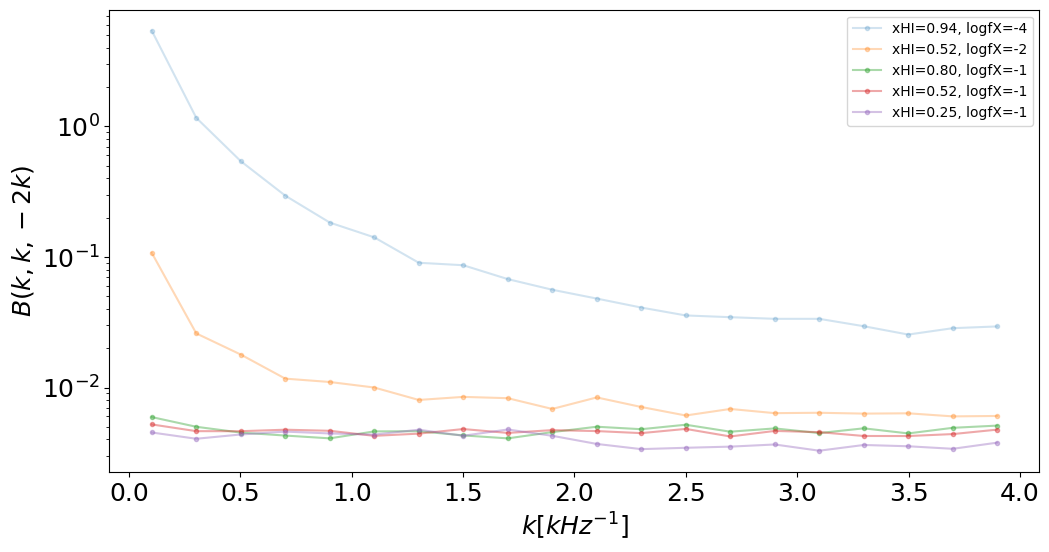

In [89]:
(paramsn, freqn, losn, psn, ksn, bispecn, kbispecn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=1000, min_los=True)
(paramssn25_1, freqsn25_1, lossn25_1, pssn25_1, kssn25_1, bispecsn25_1, kbispec25_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)
(paramssn52_2, freqsn52_2, lossn52_2, pssn52_2, kssn52_2, bispecsn52_2, kbispec52_2) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)
(paramssn94_4, freqsn94_4, lossn94_4, pssn94_4, kssn94_4, bispecsn94_4, kbispec94_4) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)
(paramssomax, freqsomax, lossomax, pssomax, kssomax, bispecsomax, kbispecsomax) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_8kHz.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)
(paramssn80_1, freqsn80_1, lossn80_1, pssn80_1, kssn80_1, bispecsn80_1, kbispec80_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)
(paramssn52_1, freqsn52_1, lossn52_1, pssn52_1, kssn52_1, bispecsn52_1, kbispec52_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10, ps_bins=20, limitsamplesize=10, min_los=True)

print(kbispec94_4.shape)
print(bispecsn94_4.shape)
base.initplt()
plt.plot(kbispec94_4[0]*8, bispecsn94_4[0], marker='.', alpha=0.2, label='xHI=0.94, logfX=-4')
plt.plot(kbispec52_2[0]*8, bispecsn52_2[0], marker='.', alpha=0.3, label='xHI=0.52, logfX=-2')
plt.plot(kbispec80_1[0]*8, bispecsn80_1[0], marker='.', alpha=0.4, label='xHI=0.80, logfX=-1')
plt.plot(kbispec52_1[0]*8, bispecsn52_1[0], marker='.', alpha=0.4, label='xHI=0.52, logfX=-1')
plt.plot(kbispec25_1[0]*8, bispecsn25_1[0], marker='.', alpha=0.4, label='xHI=0.25, logfX=-1')

plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()

files to load: 21
sample bispectrum:[0.00433304 0.00422778 0.00450469 0.00384288]
sample k_bispec:[0.00660301 0.0190849  0.0315668  0.0440487 ]

Combined data shape: (21, 2762)
Combined parameters shape: (21, 2)
loaded dataset: (21, 2)


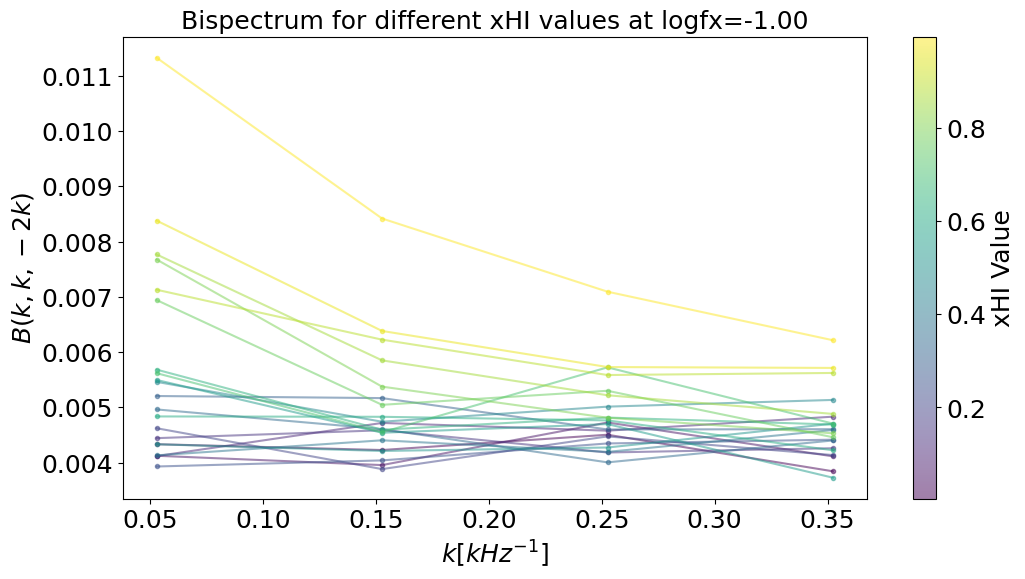

In [95]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=40, min_los=True, perc_bins=10)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 0].min(), params10sn[:, 0].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 0]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('xHI Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
plt.title('Bispectrum for different xHI values at logfx=-1.00')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


files to load: 21
sample bispectrum:[0.00079559 0.00082164 0.00085233 0.0007726  0.00070513 0.0007623
 0.00080636 0.00060617 0.00056324 0.00056022 0.0010976  0.00105424
 0.00123478 0.00112684 0.00099868 0.00101971 0.00112263 0.00110285
 0.00112792 0.00105241]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (21, 2762)
Combined parameters shape: (21, 2)
loaded dataset: (21, 2)


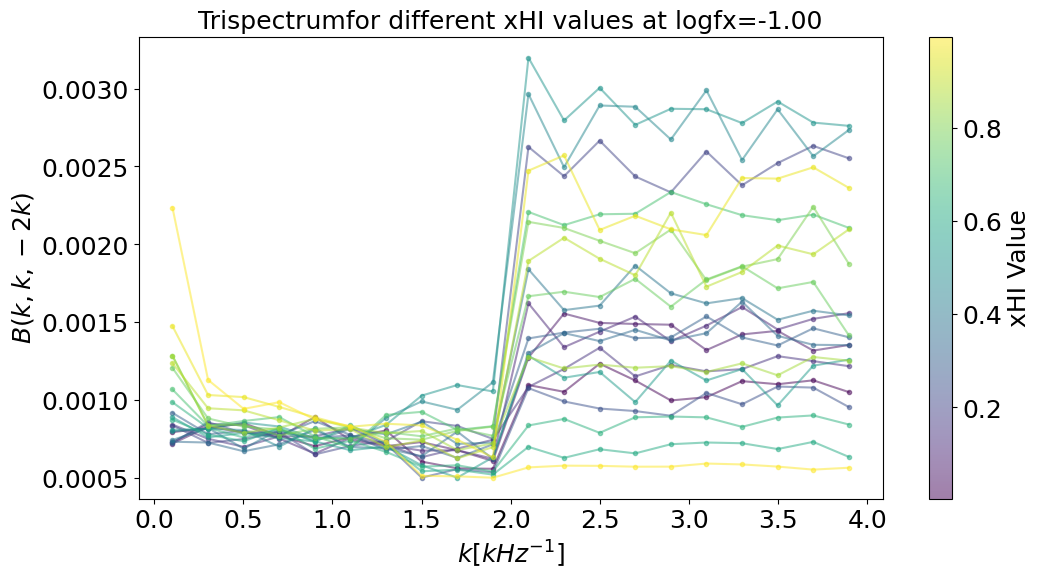

In [59]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=20, min_los=True)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 0].min(), params10sn[:, 0].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 0]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('xHI Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
plt.title('Trispectrumfor different xHI values at logfx=-1.00')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


files to load: 19
sample bispectrum:[0.00408117 0.00466694 0.00406171 0.00355184 0.00409787 0.00415623
 0.00373894 0.00416209 0.00432282 0.004322   0.00432169 0.00497878
 0.00449989 0.00461826 0.00418484 0.0043225  0.00438943 0.00418758
 0.00445716 0.00381084 0.00525777 0.00485597 0.00510466 0.00598729
 0.00581752 0.004895   0.00485406 0.00553628 0.00491883 0.00481014
 0.0056816  0.00522045 0.00513433 0.00591399 0.00502537 0.00568277
 0.00562416 0.00516872 0.00557755 0.0054016 ]
sample k_bispec:[0.00660301 0.0190849  0.0315668  0.0440487  0.05653059 0.06901249
 0.08149439 0.09397629 0.10645818 0.11894008 0.13142198 0.14390387
 0.15638577 0.16886767 0.18134957 0.19383146 0.20631336 0.21879526
 0.23127715 0.24375905 0.25624095 0.26872285 0.28120474 0.29368664
 0.30616854 0.31865043 0.33113233 0.34361423 0.35609613 0.36857802
 0.38105992 0.39354182 0.40602371 0.41850561 0.43098751 0.44346941
 0.4559513  0.4684332  0.4809151  0.49339699]

Combined data shape: (19, 2762)
Combined parameters

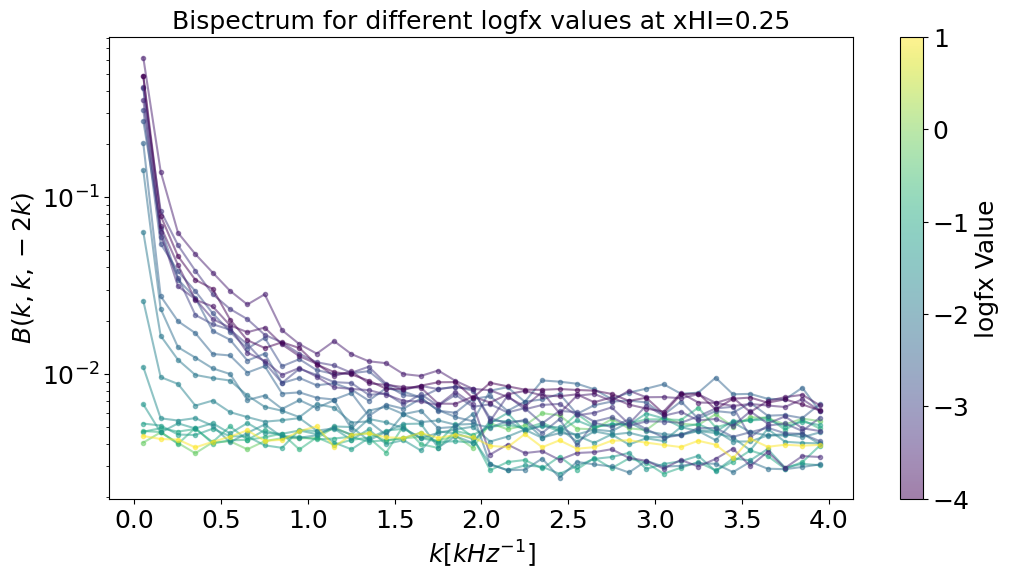

In [67]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX*_xHI0.25_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=40, min_los=True)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 1].min(), params10sn[:, 1].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 1]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('logfx Value')  # Label for the colorbar

plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
plt.title('Bispectrum for different logfx values at xHI=0.25')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


files to load: 19
sample bispectrum:[0.00436981 0.00381047 0.00412663 0.00394745 0.00432242 0.00464548
 0.00455822 0.00425267 0.00428997 0.00413869 0.00505396 0.00555237
 0.00534958 0.00520012 0.0048637  0.00544768 0.00552981 0.00535883
 0.00539314 0.0054883 ]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (19, 2762)
Combined parameters shape: (19, 2)
loaded dataset: (19, 2)


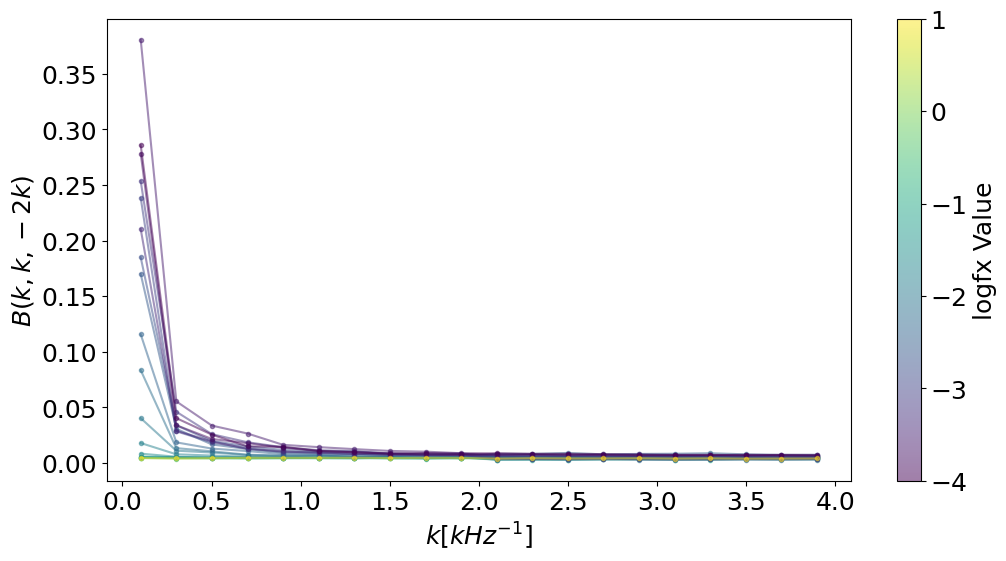

In [28]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX*_xHI0.25_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=20, min_los=False)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 1].min(), params10sn[:, 1].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 1]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('logfx Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


In [29]:
file = glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t500h*.dat")
_, _, los, ps, ks, bispec, kbispec = load_dataset(file, psbatchsize=10, limitsamplesize=20, ps_bins=20)

los1 = los[0,:4]
print(f"los={los1}")
n_pixels = len(los1)
delta_k = np.fft.fft(los1)
print(f"delta_k={delta_k}")
num_bins = n_pixels//2+1
k = np.fft.fftfreq(n_pixels)
# Compute bispectrum for k1 = k2
bispectrum = np.zeros(num_bins)
for i,k1 in enumerate(k[:num_bins]):
    k1_idx = np.argmin(np.abs(k - k1), axis=0)
    k3_idx = np.argmin(np.abs(k + 2 * k1), axis=0)

    # Bispectrum B(k1, k1, -2k1)
    B = (delta_k[k1_idx] * delta_k[k1_idx] * delta_k[k3_idx].conj()).real
    bispectrum[i] = np.abs(B)
print(f"bispectrum={bispectrum}")


los2 = los[:1,:4]
print(f"los={los2}")
n_pixels = len(los2[0])
delta_k = np.fft.fft(los2, axis=1)
print(f"delta_k={delta_k}")
num_bins = n_pixels//2+1
k = np.fft.fftfreq(n_pixels)
# Compute bispectrum for k1 = k2
bispectrum = np.zeros((2,num_bins))
for i,k1 in enumerate(k[:num_bins]):
    k1_idx = np.argmin(np.abs(k - k1), axis=0)
    k3_idx = np.argmin(np.abs(k + 2 * k1), axis=0)

    # Bispectrum B(k1, k1, -2k1)
    B = (delta_k[:,k1_idx] * delta_k[:,k1_idx] * delta_k[:,k3_idx].conj()).real
    bispectrum[:,i] = np.abs(B)
print(f"bispectrum={bispectrum}")


sample bispectrum:[0.04342207 0.01140385 0.00947184 0.00680831 0.00689093 0.00594918
 0.00594983 0.00576295 0.00601175 0.00539022 0.00392706 0.00378478
 0.0034599  0.00403989 0.00295744 0.00389102 0.00339421 0.00345413
 0.00292807 0.00287921]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (2, 2762)
Combined parameters shape: (2, 2)
los=[0.9967392  1.0010431  0.9976548  0.99763525]
delta_k=[ 3.99307233e+00+0.j         -9.15586948e-04-0.00340784j
 -4.28432226e-03+0.j         -9.15586948e-04+0.00340784j]
bispectrum=[6.36680475e+01 4.61637715e-08 1.68059805e-08]
los=[[0.9967392  1.0010431  0.9976548  0.99763525]]
delta_k=[[ 3.99307233e+00+0.j         -9.15586948e-04-0.00340784j
  -4.28432226e-03+0.j         -9.15586948e-04+0.00340784j]]
bispectrum=[[6.36680475e+01 4.61637715e-0

In [30]:
print(kbispec)
np.savetxt('./saved_output/bispectrum_data/kbispec.csv', kbispec[0], delimiter=',')

[[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
  0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
  0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
  0.46219225 0.48715605]
 [0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
  0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
  0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
  0.46219225 0.48715605]]
